In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Some Important keypoints:-


'''      silhouette_score

The range of Silhouette score is [-1, 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.
'''








'''      PCA
used for data compression
         dimentionality reduction
         



 a large chunk of the information across the full dataset is effectively compressed in fewer feature columns
 . This enables dimensionality reduction '''


'''      %Matplotlib_inline

it is a magic function.

%matplotlib inline makes your plot outputs appear and be stored within the notebook

'''



'      %Matplotlib_inline\n\nit is a magic function.\n\n%matplotlib inline makes your plot outputs appear and be stored within the notebook\n\n'

In [3]:
# importing the data set
df = pd.read_csv(r'D:\Gaurav\kmeans\red_wine_Quality\winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.shape

(1599, 12)

<AxesSubplot:xlabel='total sulfur dioxide'>

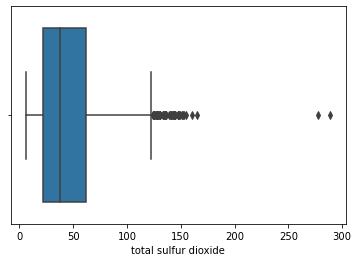

In [10]:
#lets check outliers
sns.boxplot(x=df['total sulfur dioxide'])


In [17]:
#yes we have outlier present in our data set , as we dont have any supervisor to make sure that we have to remove this or not , so we will continue with this only

In [18]:
# now we will find out the correlation between the columns entites

Text(0.5, 1.0, 'Correlation between different entities')

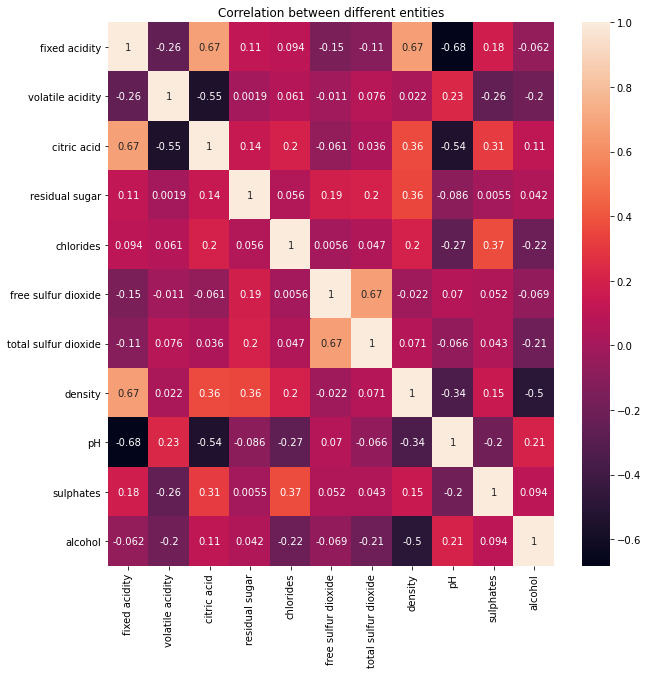

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between different entities')

In [33]:
# we can see that alcohal and quality has high correlation 
# so we can drop the quality column

df = df.drop('quality', axis=1)
df.column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
# now we will find out the number of clusters to be maded using the elbow method

Text(0, 0.5, 'WCSS')

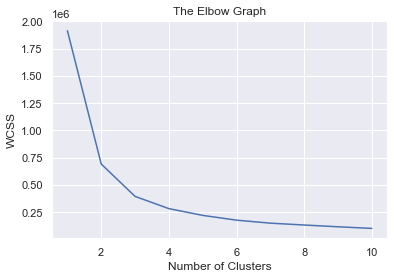

In [37]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=20,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Now we will plot the elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  

In [38]:
# optimized number of clusters ============          3

In [39]:
kmeans = KMeans(n_clusters=3, random_state=0, init = 'k-means++')
Y = kmeans.fit_predict(df)
print(Y)

[0 2 2 ... 2 2 2]


In [43]:
# sooo  here we got 3 clusters i.r. 0,1,2 now we will move a little further

In [47]:
pca = PCA()
X = pca.fit_transform(df)

In [48]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

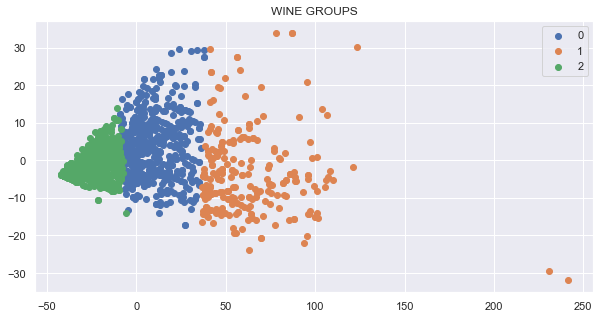

In [54]:
plt.figure(figsize=(10,5))
for i in unique_labels:
    plt.scatter(X[label==i,0],X[label==i,1], label = i)
    plt.legend()
    plt.title('WINE GROUPS')
    plt.show